<a href="https://colab.research.google.com/github/ViniciusCastillo/BootcampAlura_ProjetoModulo1/blob/main/Notebooks/2_AnaliseRegioes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto do Módulo 1 - Análise de algumas informações da base de produção hospitalardo do SUS - Visão por Região
Olá, bem vindo!

Continuando a análise (recomendo olharem a Análise do Brasil antes), agora vou comparar as regiões para verificar possíveis comportamentos distintos por região.

A parte de importação, análise e definição do período de análise explorei bem na análise anterior, então nesta não comentarei muito o processo para já iremos para as avaliações dos gráficos.

In [1]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
# configurando formato de apresentação de números
pd.options.display.float_format = "{:,.2f}".format

In [2]:
# configurando cores de fundo dos gráfico
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['legend.edgecolor'] = 'grey'
plt.rcParams['legend.facecolor'] = 'lightgrey'
plt.rcParams['text.color'] = 'black'

In [3]:
# Criando base de código da região utilizado no DataSUS, conforme padrão já identificado nas aulas e explorações anteriores
Base_regioes = pd.DataFrame({"Cod":["1","2","3","4","5"],"Região":["Norte","Nordeste","Sudeste","Sul","Centro-Oeste"]}, columns=["Cod","Região"])
Base_regioes = Base_regioes.set_index("Cod")


In [4]:
# carregando a base de quantidade de internações
internacoes = pd.read_csv("https://raw.githubusercontent.com/ViniciusCastillo/BootcampAlura_ProjetoModulo1/main/Bases/internacoes.csv", encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",")
internacoes["Cod_Região"]=internacoes["Unidade da Federação"].str[0] # criando o campo do códgio da região
internacoes = internacoes.join(Base_regioes, on="Cod_Região") # inclui os nomes das regiões em dados
internacoes["Unidade da Federação"] = internacoes["Unidade da Federação"].str.replace("\d+", "") # retirando os números do nome dos estados
internacoes["Unidade da Federação"] = internacoes["Unidade da Federação"].str.strip() # retirando os espaços antes e depois dos nomes
internacoes = internacoes.set_index(["Unidade da Federação"]) # definindo UF como índice

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [5]:
# carregando a base de gastos
gastos = pd.read_csv("https://raw.githubusercontent.com/ViniciusCastillo/BootcampAlura_ProjetoModulo1/main/Bases/gastos.csv", encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",")
gastos["Cod_Região"]=gastos["Unidade da Federação"].str[0] # criando o campo do códgio da região
gastos = gastos.join(Base_regioes, on="Cod_Região") # trazendo os nomes das regiões para a base
gastos["Unidade da Federação"] = gastos["Unidade da Federação"].str.replace("\d+", "") # retirando os números do nome dos estados
gastos["Unidade da Federação"] = gastos["Unidade da Federação"].str.strip() # retirando os espaços antes e depois dos nomes
gastos = gastos.set_index("Unidade da Federação") # definindo UF como índice

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [6]:
# carregando a base de quantidade de óbitos
obitos = pd.read_csv("https://github.com/ViniciusCastillo/BootcampAlura_ProjetoModulo1/raw/main/Bases/obitos.csv", encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",")
obitos["Cod_Região"]=obitos["Unidade da Federação"].str[0] # criando o campo do códgio da região
obitos = obitos.join(Base_regioes, on="Cod_Região") # inclui os nomes das regiões em dados
obitos["Unidade da Federação"] = obitos["Unidade da Federação"].str.replace("\d+", "") # retirando os números do nome dos estados
obitos["Unidade da Federação"] = obitos["Unidade da Federação"].str.strip() # retirando os espaços antes e depois dos nomes
obitos = obitos.set_index("Unidade da Federação") # definindo UF como índice

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [7]:
anos = [2014,2015,2016,2017,2018,2019,2020,2021] # anos selecionados
# cria tabela de meses e trimestres
MesTri = pd.DataFrame({"Tri": ["1ºTri","1ºTri","1ºTri","2ºTri","2ºTri","2ºTri","3ºTri","3ºTri","3ºTri","4ºTri","4ºTri","4ºTri"],
                       "Mes": ["Jan","Fev","Mar","Abr","Mai","Jun","Jul","Ago","Set","Out", "Nov", "Dez"]}).set_index("Mes") 
# cria a lista com todos os anos, meses e trimestres para permitir olhar de forma mais agrupada os dados
selecao = []
for ano in anos:
  for mes in MesTri.index:
    selecao = selecao + [[str(ano)+"/"+mes,str(ano)+"/"+MesTri.loc[mes]["Tri"], str(ano), MesTri.loc[mes]["Tri"], mes]]

selecao = pd.DataFrame(selecao, columns=["AnoMes","AnoTri","Ano","Tri","Mes"]).set_index("AnoMes") # transforma a lista em um dataframe
selecao = selecao[:-6] # retira o último semestre de 2021 por sabermos que os últimos meses não são tão completos

In [8]:
# pegando base de tamanho da população de 2001 até 2020 e fazendo alguns tratamentos nas colunas e linhas
populacao = pd.read_excel("https://github.com/ViniciusCastillo/BootcampAlura_ProjetoModulo1/raw/main/Bases/PopulacaoAnual_2001_2020.xls", skiprows=4, skipfooter=10)
populacao = populacao.drop([0, 1]) # excluindo as colunas que não tem informação relevante
populacao = populacao.set_index("Unidades da Federação") # definindo o índice
# excluindo as linhas de Regiões
Regioes = [i for i in populacao.index if "Região" in i] # selecionando as regiões
populacao = populacao.drop(index=Regioes) # excluindo as regiões

In [9]:
# pegando base de tamanho da população de 2021 e fazendo alguns tratamentos nas colunas e linhas
populacao21 = pd.read_excel("https://github.com/ViniciusCastillo/BootcampAlura_ProjetoModulo1/raw/main/Bases/PopulacaoAnual_2021.xls", skiprows=2, skipfooter=7)
populacao21 = populacao21.rename(columns={"Brasil":"UF", 213317639:"2021/Jul"}) # alterando o nome das colunas
populacao21 = populacao21.set_index("UF") # definindo o índice
# excluindo as linhas que não são UFs
Regioes = [i for i in populacao21.index if "Região" in i] # selecionando as regiões
populacao21 = populacao21.drop(index=Regioes, columns=["Unnamed: 1"]) # excluindo as regiões e a coluna que não tem informação relevante
populacao21["2021/Jul"] = populacao21["2021/Jul"].astype(str) # transforma o campo em string
populacao21["2021/Jul"] = populacao21["2021/Jul"].str.replace("\(\d\)","") # removemos os itens do tipo: (1), (2), etc.
populacao21["2021/Jul"] = populacao21["2021/Jul"].str.replace("\D","") # removemos os .
populacao21["2021/Jul"] = populacao21["2021/Jul"].astype(float) # transformamos em número

In [10]:
# comecando a criação da base de população por trimestre, primeiro copiando a base de 2021, alterando o nome da coluna
populacaoTri = populacao21.rename(columns={"2021/Jul":"2021/2ºTri"})
populacaoTri["2021/1ºTri"] = np.nan # adicionando o 1ºTri de 2021 vazio
# criando um campo de anos com um ano anterior a selecao para permitir a interpolação posterior
selAnos = [anos[0]-1]
selAnos = selAnos + [int(ano) for ano in anos]
# criando uma lista de trimestres a partir da base MesTri, eliminando as duplicidades
tris = [tri for tri in MesTri["Tri"]]
tris = list(dict.fromkeys(tris)) # elimina as duplicidades
for ano in populacao.columns:
  if ano in selAnos:
    for tri in tris:
      if tri == "2ºTri":
        populacaoTri[str(ano)+"/2ºTri"] = populacao[ano] # se for o 2ºTri pega o valor do ano
      else:
        populacaoTri[str(ano)+"/"+tri] = np.nan # se não deixa vazio
populacaoTri = populacaoTri.T.reset_index() # tranpondo a base
populacaoTri = populacaoTri.rename(columns={"index":"AnoTri"}) # nomeando a coluna de AnoTri 
populacaoTri = populacaoTri.set_index("AnoTri") # definindo ela como índice
populacaoTri = populacaoTri.sort_index() # ordenando por ela
populacaoTri = populacaoTri.interpolate() # interpolando a base
populacaoTri = populacaoTri[4:] # removendo o ano anterior que está fora do período selecionado
populacaoTri["Brasil"] = populacaoTri.sum(axis=1) # cria a coluna Brasil na base de população

In [11]:
# criando a base por trimestre de internações
triInternacoes = internacoes.T.join(selecao, how="inner") # adicionando a informação de trimestre e filtrando os anos selecionados
triInternacoes = triInternacoes.groupby(["AnoTri"],).sum() # agrupando por trimestre
triInternacoes = triInternacoes[triInternacoes.columns[:-3]] # removendo colunas desnecessárias que vieram no join
triInternacoes["Brasil"] = triInternacoes.sum(axis=1) # cria a coluna Brasil na base de internações

In [12]:
# criando a base por trimestre de gastos
triGastos = gastos.T.join(selecao, how="inner") # adicionando a informação de trimestre e filtrando os anos selecionados
triGastos = triGastos.groupby(["AnoTri"],).sum() # agrupando por trimestre
triGastos = triGastos[triGastos.columns[:-3]] # removendo colunas desnecessárias que vieram no join
triGastos["Brasil"] = triGastos.sum(axis=1) # cria a coluna Brasil na base de gastos


In [13]:
# criando a base por trimestre de obitos
triObitos = obitos.T.join(selecao, how="inner") # adicionando a informação de trimestre e filtrando os anos selecionados
triObitos = triObitos.groupby(["AnoTri"],).sum() # agrupando por trimestre
triObitos = triObitos[triObitos.columns[:-3]] # removendo colunas desnecessárias que vieram no join
triObitos["Brasil"] = triObitos.sum(axis=1) # cria a coluna Brasil na base de gastos

Com as bases trimestrais podemos começar as relações entre elas para analisarmos. 

Para este notebook vou focar em olhar os dados por Região do Brasil e verificar se temos algo diferente em alguma delas, que não segue o comportamento do Brasil como um todo que avaliei no notebook anterior.

A seguir vou incluir os campos de região, fazer as relações e plotar os primeiros gráficos.

In [14]:
# criando tabela de região por estado
EstadoRegiao = pd.DataFrame(gastos["Região"]) # criando tabela de estado e região
EstadoRegiao["Estado"] = EstadoRegiao.index # copiando o index para uma coluna chamada estado
EstadoRegiao = EstadoRegiao.set_index("Região") # transformando o campo região em índice
for regiao in Base_regioes["Região"]:
  triInternacoes[regiao] = 0
  triGastos[regiao] = 0
  triObitos[regiao] = 0
  populacaoTri[regiao] = 0
  for estado in EstadoRegiao["Estado"].filter(regex=regiao, axis=0):
    triInternacoes[regiao] = triInternacoes[regiao]+triInternacoes[estado]
    triGastos[regiao] = triGastos[regiao]+triGastos[estado]
    triObitos[regiao] = triObitos[regiao]+triObitos[estado]
    populacaoTri[regiao] = populacaoTri[regiao]+populacaoTri[estado]

In [15]:
triInternacoes[triInternacoes.columns[-8:]].head()

,Goiás,Distrito Federal,Brasil,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
AnoTri,,,,,,,,
2014/1ºTri,85795,45269,2767725,243628,751933,1086942,469390,215832
2014/2ºTri,90990,47055,2886530,250501,781571,1135480,491043,227935
2014/3ºTri,88772,45249,2925539,250656,795402,1148598,507723,223160
2014/4ºTri,85549,41886,2773909,240866,748551,1091548,480268,212676
2015/1ºTri,88862,41429,2786853,236377,745673,1113505,475796,215502


In [16]:
triGastos[triGastos.columns[-8:]].head()

,Goiás,Distrito Federal,Brasil,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
AnoTri,,,,,,,,
2014/1ºTri,"93,153,130.40","46,946,133.62","3,222,012,529.50","174,075,505.16","754,270,933.34","1,426,821,019.62","643,929,822.15","222,915,249.23"
2014/2ºTri,"100,334,069.11","50,686,450.07","3,346,188,843.05","183,826,365.10","777,689,949.08","1,467,666,459.34","678,370,983.29","238,635,086.24"
2014/3ºTri,"103,584,495.45","44,851,757.14","3,467,328,570.64","184,837,627.21","805,177,912.32","1,525,146,805.51","715,014,882.58","237,151,343.02"
2014/4ºTri,"102,769,721.55","41,517,335.67","3,293,840,029.74","183,319,822.29","765,877,328.84","1,438,277,555.03","676,771,025.07","229,594,298.51"
2015/1ºTri,"103,309,928.77","41,225,834.69","3,303,159,999.59","184,476,120.77","765,454,001.53","1,455,035,328.69","667,120,506.71","231,074,041.89"


In [17]:
triObitos[triObitos.columns[-8:]].head()

,Goiás,Distrito Federal,Brasil,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
AnoTri,,,,,,,,
2014/1ºTri,2488,1396,108502,5428,24577,51617,19993,6887
2014/2ºTri,2754,1536,113011,5732,25394,53693,20785,7407
2014/3ºTri,2778,1476,117154,5543,26269,56092,21920,7330
2014/4ºTri,2698,1331,112238,5590,25959,53614,20077,6998
2015/1ºTri,2704,1362,112076,5759,26061,53730,19447,7079


In [18]:
populacaoTri[populacaoTri.columns[-8:]].head()

UF,Goiás,Distrito Federal,Brasil,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
AnoTri,,,,,,,,
2014/1ºTri,"6,500,928.50","2,836,719.25","202,334,600.00","17,169,141.25","56,088,319.25","84,953,109.75","28,961,026.00","15,163,003.75"
2014/2ºTri,"6,523,222.00","2,852,372.00","202,768,562.00","17,231,027.00","56,186,190.00","85,115,623.00","29,016,114.00","15,219,608.00"
2014/3ºTri,"6,545,086.75","2,867,986.50","203,189,083.75","17,291,429.25","56,279,662.75","85,273,097.25","29,069,630.50","15,275,264.00"
2014/4ºTri,"6,566,951.50","2,883,601.00","203,609,605.50","17,351,831.50","56,373,135.50","85,430,571.50","29,123,147.00","15,330,920.00"
2015/1ºTri,"6,588,816.25","2,899,215.50","204,030,127.25","17,412,233.75","56,466,608.25","85,588,045.75","29,176,663.50","15,386,576.00"


In [19]:
triIntHab = triInternacoes/populacaoTri # cria base de internações por habitante
triGastosHab = triGastos/populacaoTri # cria base de gastos por habitante
triObitosHab = triObitos/populacaoTri # cria base de obitos por habitante
triObitosInt = triObitos/triInternacoes # cria base de obitos por internações
triGastosInt = triGastos/triInternacoes # cria base de gastos por internações

In [20]:
# define os labels do eixoX
labelEixoX = selecao["AnoTri"].tolist()
labelEixoX = list(dict.fromkeys(labelEixoX))
# define as posições que serão substituidas por esses labels
valoresEixoX = [i for i in range(0,len(labelEixoX))]
# criando o campo de regiões que iremos utilizar nos filtros dos gráficos
selecaoGrafico = EstadoRegiao.index.to_list()
selecaoGrafico = list(dict.fromkeys(selecaoGrafico))
selecaoGrafico

['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

<function matplotlib.pyplot.show>

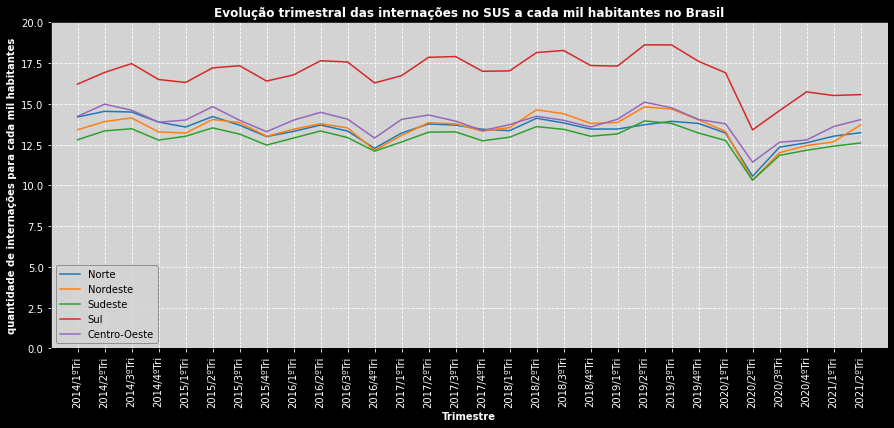

In [21]:
ax = triIntHab.plot(y=selecaoGrafico, figsize=(15,6), legend=True)
escalaY = 1e3
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x*escalaY)))
ax.set_ylim(0,20/escalaY)
ax.set_xlim(-1,len(labelEixoX))
ax.set_facecolor("lightgrey")
plt.grid(color='white', linestyle="--")
plt.xticks(valoresEixoX, labelEixoX, rotation=90)
plt.ylabel("quantidade de internações para cada mil habitantes", fontweight="bold", color="white")
plt.xlabel("Trimestre", fontweight="bold", color="white")
plt.title("Evolução trimestral das internações no SUS a cada mil habitantes no Brasil", fontweight="bold", color="white")
plt.show

<function matplotlib.pyplot.show>

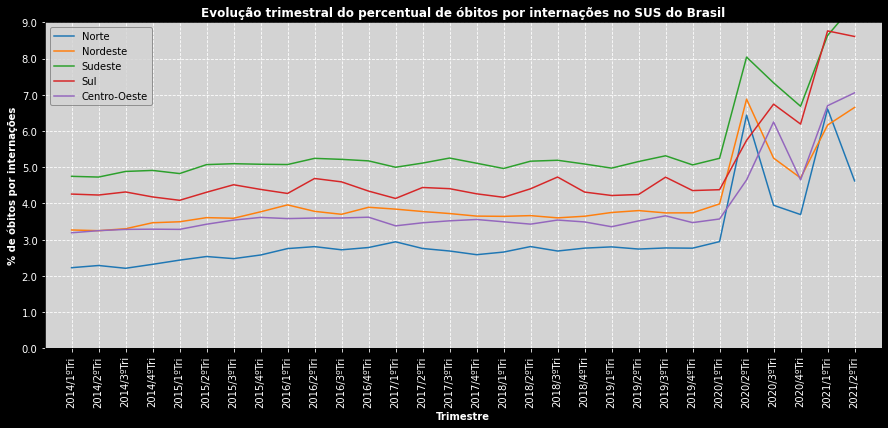

In [22]:
ax = triObitosInt.plot(y=selecaoGrafico, figsize=(15,6), legend=True)
escalaY = 1e2
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x*escalaY)))
ax.set_ylim(0,9/escalaY)
ax.set_xlim(-1,len(labelEixoX))
ax.set_facecolor("lightgrey")
plt.grid(color='white', linestyle="--")
plt.xticks(valoresEixoX, labelEixoX, rotation=90)
plt.ylabel("% de óbitos por internações", fontweight="bold", color="white")
plt.xlabel("Trimestre", fontweight="bold", color="white")
plt.title("Evolução trimestral do percentual de óbitos por internações no SUS do Brasil", fontweight="bold", color="white")
plt.show

<function matplotlib.pyplot.show>

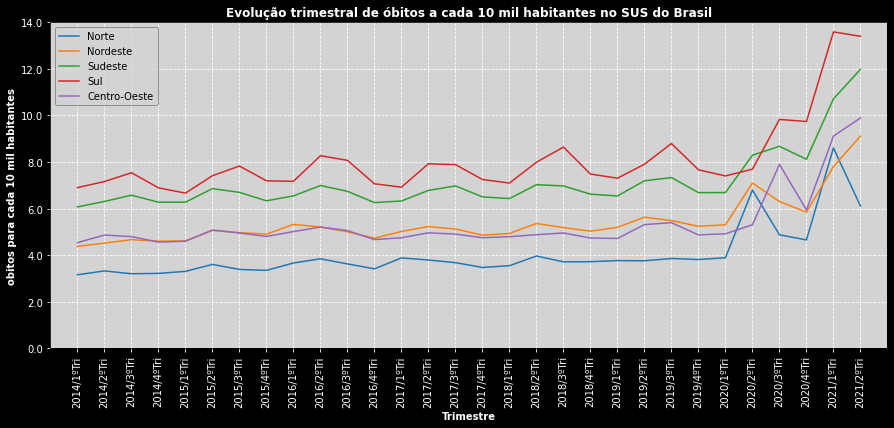

In [23]:
ax = triObitosHab.plot(y=selecaoGrafico, figsize=(15,6), legend=True)
escalaY = 1e4
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x*escalaY)))
ax.set_ylim(0,14/escalaY)
ax.set_xlim(-1,len(labelEixoX))
ax.set_facecolor("lightgrey")
plt.grid(color='white', linestyle="--")
plt.xticks(valoresEixoX, labelEixoX, rotation=90)
plt.ylabel("obitos para cada 10 mil habitantes", fontweight="bold", color="white")
plt.xlabel("Trimestre", fontweight="bold", color="white")
plt.title("Evolução trimestral de óbitos a cada 10 mil habitantes no SUS do Brasil", fontweight="bold", color="white")
plt.show

<function matplotlib.pyplot.show>

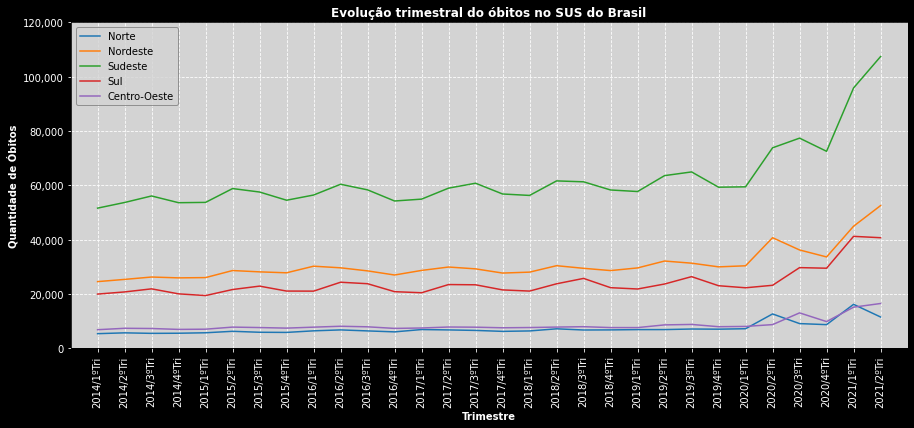

In [24]:
ax = triObitos.plot(y=selecaoGrafico, figsize=(15,6), legend=True)
escalaY = 1
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/escalaY)))
ax.set_ylim(0,120000)
ax.set_xlim(-1,len(labelEixoX))
ax.set_facecolor("lightgrey")
plt.grid(color='white', linestyle="--")
plt.xticks(valoresEixoX, labelEixoX, rotation=90)
plt.ylabel("Quantidade de Óbitos", fontweight="bold", color="white")
plt.xlabel("Trimestre", fontweight="bold", color="white")
plt.title("Evolução trimestral do óbitos no SUS do Brasil", fontweight="bold", color="white")
plt.show

<function matplotlib.pyplot.show>

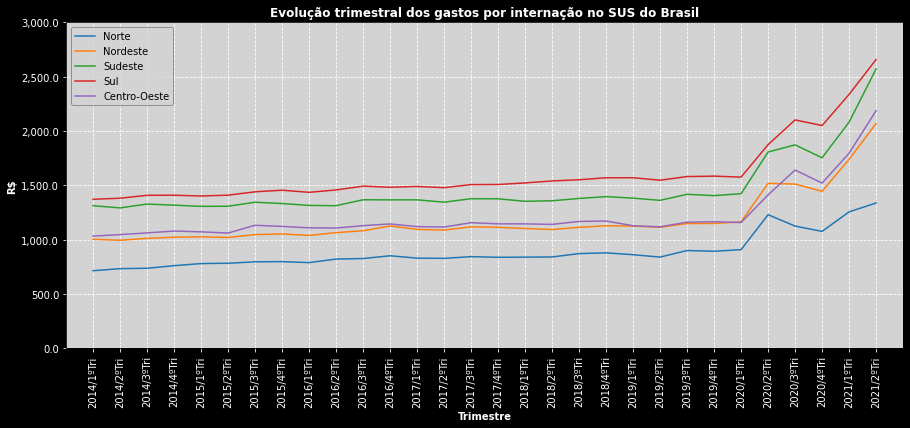

In [25]:
ax = triGastosInt.plot(y=selecaoGrafico, figsize=(15,6), legend=True)
escalaY = 1
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))
ax.set_ylim(0,3000)
ax.set_xlim(-1,len(labelEixoX))
ax.set_facecolor("lightgrey")
plt.grid(color='white', linestyle="--")
plt.xticks(valoresEixoX, labelEixoX, rotation=90)
plt.ylabel("R$", fontweight="bold", color="white")
plt.xlabel("Trimestre", fontweight="bold", color="white")
plt.title("Evolução trimestral dos gastos por internação no SUS do Brasil", fontweight="bold", color="white")
plt.show

<function matplotlib.pyplot.show>

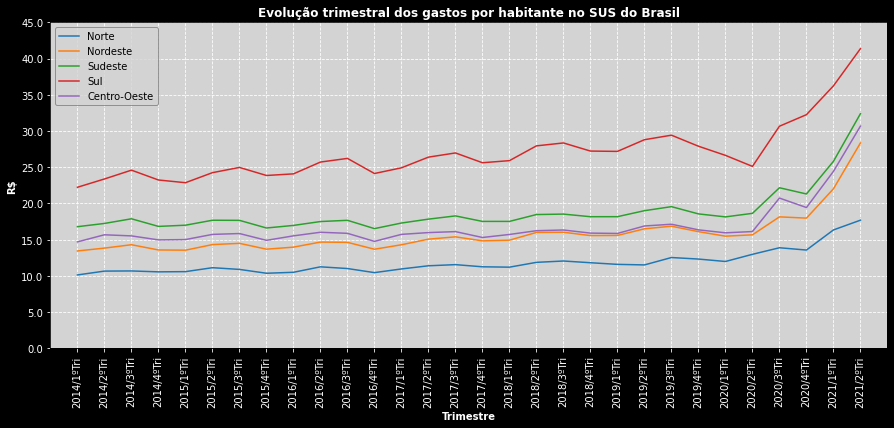

In [26]:
ax = triGastosHab.plot(y=selecaoGrafico, figsize=(15,6), legend=True)
escalaY = 1
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))
ax.set_ylim(0,45)
ax.set_xlim(-1,len(labelEixoX))
ax.set_facecolor("lightgrey")
plt.grid(color='white', linestyle="--")
plt.xticks(valoresEixoX, labelEixoX, rotation=90)
plt.ylabel("R$", fontweight="bold", color="white")
plt.xlabel("Trimestre", fontweight="bold", color="white")
plt.title("Evolução trimestral dos gastos por habitante no SUS do Brasil", fontweight="bold", color="white")
plt.show

#Análise
Comparando os gráficos por região com o que vimos no Brasil como um todo, vemos que os comportamentos por região não um tanto padrão, apesar de a direção geral ser parecida, por trimestre temos comportamentos bem distintos, principalmente no período da pandemia de covid-19.

Primeiro vamos só confirmar o que já aparenta nos gráficos que nem todas as regiões tem uma sazonalidade de óbitos, como o Brazil.

Abaixo uma demonstração dessa sazonalidade em cima do dado de óbitos:

<function matplotlib.pyplot.show>

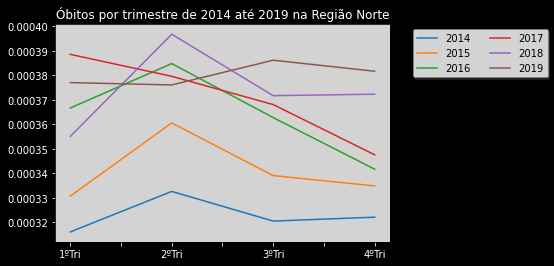

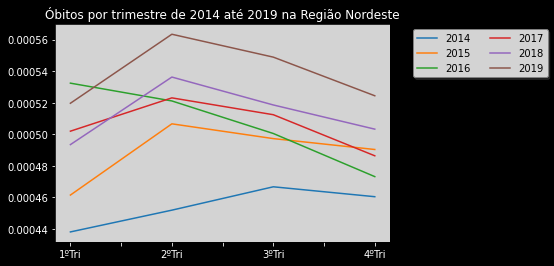

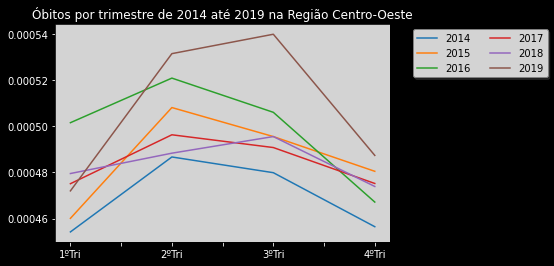

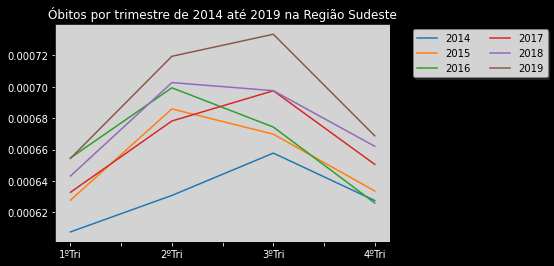

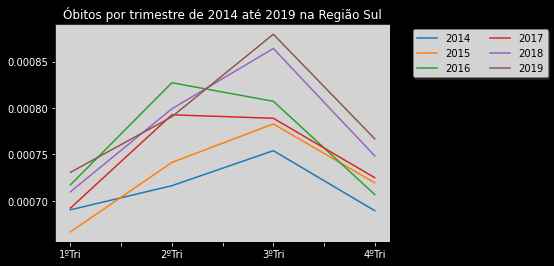

In [27]:
obitosSazonalNorte = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triObitosHab.loc[str(ano)+"/"+tri]["Norte"]]
    obitosSazonalNorte = obitosSazonalNorte + [dado]

obitosSazonalNorte = pd.DataFrame(obitosSazonalNorte, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
ax = obitosSazonalNorte.T.plot()
ax.legend(loc='upper center', bbox_to_anchor=(1.27, 1),
          ncol=2, fancybox=True, shadow=True)
ax.set_facecolor("lightgrey")
plt.title("Óbitos por trimestre de 2014 até 2019 na Região Norte", color="white")

obitosSazonalNordeste = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triObitosHab.loc[str(ano)+"/"+tri]["Nordeste"]]
    obitosSazonalNordeste = obitosSazonalNordeste + [dado]

obitosSazonalNordeste = pd.DataFrame(obitosSazonalNordeste, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
ax1 = obitosSazonalNordeste.T.plot()
ax1.legend(loc='upper center', bbox_to_anchor=(1.27, 1),
          ncol=2, fancybox=True, shadow=True)
ax1.set_facecolor("lightgrey")
plt.title("Óbitos por trimestre de 2014 até 2019 na Região Nordeste", color="white")

obitosSazonalCentroOeste = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triObitosHab.loc[str(ano)+"/"+tri]["Centro-Oeste"]]
    obitosSazonalCentroOeste = obitosSazonalCentroOeste + [dado]

obitosSazonalCentroOeste = pd.DataFrame(obitosSazonalCentroOeste, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
ax2 = obitosSazonalCentroOeste.T.plot()
ax2.legend(loc='upper center', bbox_to_anchor=(1.27, 1),
          ncol=2, fancybox=True, shadow=True)
ax2.set_facecolor("lightgrey")
plt.title("Óbitos por trimestre de 2014 até 2019 na Região Centro-Oeste", color="white")

obitosSazonalSudeste = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triObitosHab.loc[str(ano)+"/"+tri]["Sudeste"]]
    obitosSazonalSudeste = obitosSazonalSudeste + [dado]

obitosSazonalSudeste = pd.DataFrame(obitosSazonalSudeste, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
ax3 = obitosSazonalSudeste.T.plot()
ax3.legend(loc='upper center', bbox_to_anchor=(1.27, 1),
          ncol=2, fancybox=True, shadow=True)
ax3.set_facecolor("lightgrey")
plt.title("Óbitos por trimestre de 2014 até 2019 na Região Sudeste", color="white")

obitosSazonalSul = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triObitosHab.loc[str(ano)+"/"+tri]["Sul"]]
    obitosSazonalSul = obitosSazonalSul + [dado]

obitosSazonalSul = pd.DataFrame(obitosSazonalSul, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
ax4 = obitosSazonalSul.T.plot()
ax4.legend(loc='upper center', bbox_to_anchor=(1.27, 1),
          ncol=2, fancybox=True, shadow=True)
ax4.set_facecolor("lightgrey")
plt.title("Óbitos por trimestre de 2014 até 2019 na Região Sul", color="white")

plt.show


Esse gráfico da Sazonalide por região ficou bem interessante, tem alguns anos que não seguiu exatamente igual, mas podemos perceber um certo padrão por região e ele conversa muito com o explicado na live do Atila Iamarino (https://www.youtube.com/watch?v=BtVZ-Gxh8dE&list=PLRRpjE6bL5UxzWZ2T7Gt6pIlFdR4ig4YX entre 1h e 11min e 1h e 30min) sobre a sazonalida de doenças respiratórias por região, onde a Região Norte tem seu pico no 2º Tri e vai descendo até a Região Sul que tem o pico no 3º Tri. Aparentemente a sazonalidade de óbitos tem uma relação forte com doenças respiratórias, vale uma análise complementar.

Agora vamos olhar com mais calma para o período da pandemia de covid-19. Aparentemente a Região Sul foi a que mais sofreu nesse período, quando olhamos os mortos por habitante lá foi muito mais forte que em outras regiões.

Vamos repetir a análise feitas para o Brasil como um todo e verificar as diferenças que temos por região. A única alteração aqui, como o objetivo é a comparabilidade, iremos olhar óbitos por habitante, já os gastos continuam por internação.

Vamos lá:

In [28]:
obitos2020e2021 = pd.DataFrame(triObitosHab.filter(regex="2020/2ºTri|2020/3ºTri|2020/4ºTri|2021/1ºTri|2021/2ºTri", axis=0)[selecaoGrafico])
obitos2020e2021["Tri"] = obitos2020e2021.index.str[-5:]

mediaObitosTriNorte = obitosSazonalNorte.mean()
mortesAcima = 0
i=0
print("Mortes por 10 mil habitantes acima da média dos anos anteriores no SUS da Região Norte")
for anoTri in obitos2020e2021.index:
  morteAcimaTri = obitos2020e2021.loc[anoTri]["Norte"]-mediaObitosTriNorte[obitos2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.1f}".format(morteAcimaTri*10000)+
        " Ficando {:,.1%} acima da média deste Tri".format(morteAcimaTri/mediaObitosTriNorte[obitos2020e2021.loc[anoTri]["Tri"]]))
  mortesAcima = mortesAcima + morteAcimaTri
  i += 1
print("Total: {:,.1f}".format(mortesAcima/i*10000)+" Ficando {:,.1%} acima da média para o mesmo período"
.format(mortesAcima/(mediaObitosTriNorte.sum()+mediaObitosTriNorte["2ºTri"])))

print()
mediaObitosTriNordeste = obitosSazonalNordeste.mean()
mortesAcima = 0
i=0
print("Mortes por 10 mil habitantes acima da média dos anos anteriores no SUS da Região Nordeste")
for anoTri in obitos2020e2021.index:
  morteAcimaTri = obitos2020e2021.loc[anoTri]["Nordeste"]-mediaObitosTriNordeste[obitos2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.1f}".format(morteAcimaTri*10000)+
        " Ficando {:,.1%} acima da média deste Tri".format(morteAcimaTri/mediaObitosTriNordeste[obitos2020e2021.loc[anoTri]["Tri"]]))
  mortesAcima = mortesAcima + morteAcimaTri
  i += 1
print("Total: {:,.1f}".format(mortesAcima/i*10000)+" Ficando {:,.1%} acima da média para o mesmo período"
.format(mortesAcima/(mediaObitosTriNordeste.sum()+mediaObitosTriNordeste["2ºTri"])))

print()
mediaObitosTriCentroOeste = obitosSazonalCentroOeste.mean()
mortesAcima = 0
i=0
print("Mortes por 10 mil habitantes acima da média dos anos anteriores no SUS da Região Centro-Oeste")
for anoTri in obitos2020e2021.index:
  morteAcimaTri = obitos2020e2021.loc[anoTri]["Centro-Oeste"]-mediaObitosTriCentroOeste[obitos2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.1f}".format(morteAcimaTri*10000)+
        " Ficando {:,.1%} acima da média deste Tri".format(morteAcimaTri/mediaObitosTriCentroOeste[obitos2020e2021.loc[anoTri]["Tri"]]))
  mortesAcima = mortesAcima + morteAcimaTri
  i += 1
print("Total: {:,.1f}".format(mortesAcima/i*10000)+" Ficando {:,.1%} acima da média para o mesmo período"
.format(mortesAcima/(mediaObitosTriCentroOeste.sum()+mediaObitosTriCentroOeste["2ºTri"])))

print()
mediaObitosTriSudeste = obitosSazonalSudeste.mean()
mortesAcima = 0
i=0
print("Mortes por 10 mil habitantes acima da média dos anos anteriores no SUS da Região Sudeste")
for anoTri in obitos2020e2021.index:
  morteAcimaTri = obitos2020e2021.loc[anoTri]["Sudeste"]-mediaObitosTriSudeste[obitos2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.1f}".format(morteAcimaTri*10000)+
        " Ficando {:,.1%} acima da média deste Tri".format(morteAcimaTri/mediaObitosTriSudeste[obitos2020e2021.loc[anoTri]["Tri"]]))
  mortesAcima = mortesAcima + morteAcimaTri
  i += 1
print("Total: {:,.1f}".format(mortesAcima/i*10000)+" Ficando {:,.1%} acima da média para o mesmo período"
.format(mortesAcima/(mediaObitosTriSudeste.sum()+mediaObitosTriSudeste["2ºTri"])))

print()
mediaObitosTriSul = obitosSazonalSul.mean()
mortesAcima = 0
i=0
print("Mortes por 10 mil habitantes acima da média dos anos anteriores no SUS da Região Sul")
for anoTri in obitos2020e2021.index:
  morteAcimaTri = obitos2020e2021.loc[anoTri]["Sul"]-mediaObitosTriSul[obitos2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.1f}".format(morteAcimaTri*10000)+
        " Ficando {:,.1%} acima da média deste Tri".format(morteAcimaTri/mediaObitosTriSul[obitos2020e2021.loc[anoTri]["Tri"]]))
  mortesAcima = mortesAcima + morteAcimaTri
  i += 1
print("Total: {:,.1f}".format(mortesAcima/i*10000)+" Ficando {:,.1%} acima da média para o mesmo período"
.format(mortesAcima/(mediaObitosTriSul.sum()+mediaObitosTriSul["2ºTri"])))

Mortes por 10 mil habitantes acima da média dos anos anteriores no SUS da Região Norte
2020/2ºTri: 3.1 Ficando 82.8% acima da média deste Tri
2020/3ºTri: 1.3 Ficando 36.2% acima da média deste Tri
2020/4ºTri: 1.2 Ficando 33.1% acima da média deste Tri
2021/1ºTri: 5.0 Ficando 141.9% acima da média deste Tri
2021/2ºTri: 2.4 Ficando 64.5% acima da média deste Tri
Total: 2.6 Ficando 71.8% acima da média para o mesmo período

Mortes por 10 mil habitantes acima da média dos anos anteriores no SUS da Região Nordeste
2020/2ºTri: 1.9 Ficando 37.3% acima da média deste Tri
2020/3ºTri: 1.2 Ficando 24.3% acima da média deste Tri
2020/4ºTri: 1.0 Ficando 19.5% acima da média deste Tri
2021/1ºTri: 2.9 Ficando 58.9% acima da média deste Tri
2021/2ºTri: 3.9 Ficando 76.3% acima da média deste Tri
Total: 2.2 Ficando 43.4% acima da média para o mesmo período

Mortes por 10 mil habitantes acima da média dos anos anteriores no SUS da Região Centro-Oeste
2020/2ºTri: 0.3 Ficando 5.1% acima da média deste Tri


Comparando as mortes por 10 mil habitantes entre as regiões percebemos que nominalmente a região Sul realmente foi a que teve maior aumento entre todas, incremento de 3,3 mortes ao trimestre na média para cada 10mil habitantes, com um pico de 6,6 o maior de todos, e o segundo maior também está nessa região.

Porém é uma região que já tem uma média de mortes por habitante maior, fazendo com que em termos relativos, percentual de crescimento, a região que teve o maior incremento foi a Região Norte com um aumento de 72% nas mortes por habitante com relação aos períodos anteriores. Esse efeito tão forte nessa região não é surpressa, dado tudo o que acompanhamos que aconteceu em Manaus, talvez se a análise fosse por cidade poderíamos ver números até piores.

Agora vamos ver os gastos por internação:

In [29]:
gastosInt2020e2021 = pd.DataFrame(triGastosInt.filter(regex="2020/2ºTri|2020/3ºTri|2020/4ºTri|2021/1ºTri|2021/2ºTri", axis=0)[selecaoGrafico])
gastosInt2020e2021["Tri"] = gastosInt2020e2021.index.str[-5:]

gastosIntSazonalNorte = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triGastosInt.loc[str(ano)+"/"+tri]["Norte"]]
    gastosIntSazonalNorte = gastosIntSazonalNorte + [dado]

gastosIntSazonalNorte = pd.DataFrame(gastosIntSazonalNorte, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
mediaGastosIntTri = gastosIntSazonalNorte.mean()
gastosIntAcima = 0
i=0
print("Gastos por Internação Acima da Média dos Anos Anteriores no SUS na Região Norte")
for anoTri in gastosInt2020e2021.index:
  gastosIntAcimaTri = gastosInt2020e2021.loc[anoTri]["Norte"]-mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.2f}".format(round(gastosIntAcimaTri,1))+
        " Ficando {:,.1%} acima da média deste Tri".format(gastosIntAcimaTri/mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]))
  gastosIntAcima = gastosIntAcima + gastosIntAcimaTri
  i += 1
print("Média: {:,.2f}".format(gastosIntAcima/i)+" Ficando {:,.1%} acima da média anterior".format(gastosIntAcima/i/mediaGastosIntTri.mean()))

print()
gastosIntSazonalNordeste = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triGastosInt.loc[str(ano)+"/"+tri]["Nordeste"]]
    gastosIntSazonalNordeste = gastosIntSazonalNordeste + [dado]

gastosIntSazonalNordeste = pd.DataFrame(gastosIntSazonalNordeste, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
mediaGastosIntTri = gastosIntSazonalNordeste.mean()
gastosIntAcima = 0
i=0
print("Gastos por Internação Acima da Média dos Anos Anteriores no SUS na Região Nordeste")
for anoTri in gastosInt2020e2021.index:
  gastosIntAcimaTri = gastosInt2020e2021.loc[anoTri]["Nordeste"]-mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.2f}".format(round(gastosIntAcimaTri,1))+
        " Ficando {:,.1%} acima da média deste Tri".format(gastosIntAcimaTri/mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]))
  gastosIntAcima = gastosIntAcima + gastosIntAcimaTri
  i += 1
print("Média: {:,.2f}".format(gastosIntAcima/i)+" Ficando {:,.1%} acima da média anterior".format(gastosIntAcima/i/mediaGastosIntTri.mean()))

print()
gastosIntSazonalCentroOeste = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triGastosInt.loc[str(ano)+"/"+tri]["Centro-Oeste"]]
    gastosIntSazonalCentroOeste = gastosIntSazonalCentroOeste + [dado]

gastosIntSazonalCentroOeste = pd.DataFrame(gastosIntSazonalCentroOeste, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
mediaGastosIntTri = gastosIntSazonalCentroOeste.mean()
gastosIntAcima = 0
i=0
print("Gastos por Internação Acima da Média dos Anos Anteriores no SUS na Região Centro-Oeste")
for anoTri in gastosInt2020e2021.index:
  gastosIntAcimaTri = gastosInt2020e2021.loc[anoTri]["Centro-Oeste"]-mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.2f}".format(round(gastosIntAcimaTri,1))+
        " Ficando {:,.1%} acima da média deste Tri".format(gastosIntAcimaTri/mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]))
  gastosIntAcima = gastosIntAcima + gastosIntAcimaTri
  i += 1
print("Média: {:,.2f}".format(gastosIntAcima/i)+" Ficando {:,.1%} acima da média anterior".format(gastosIntAcima/i/mediaGastosIntTri.mean()))

print()
gastosIntSazonalSudeste = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triGastosInt.loc[str(ano)+"/"+tri]["Sudeste"]]
    gastosIntSazonalSudeste = gastosIntSazonalSudeste + [dado]

gastosIntSazonalSudeste = pd.DataFrame(gastosIntSazonalSudeste, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
mediaGastosIntTri = gastosIntSazonalSudeste.mean()
gastosIntAcima = 0
i=0
print("Gastos por Internação Acima da Média dos Anos Anteriores no SUS na Região Sudeste")
for anoTri in gastosInt2020e2021.index:
  gastosIntAcimaTri = gastosInt2020e2021.loc[anoTri]["Sudeste"]-mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.2f}".format(round(gastosIntAcimaTri,1))+
        " Ficando {:,.1%} acima da média deste Tri".format(gastosIntAcimaTri/mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]))
  gastosIntAcima = gastosIntAcima + gastosIntAcimaTri
  i += 1
print("Média: {:,.2f}".format(gastosIntAcima/i)+" Ficando {:,.1%} acima da média anterior".format(gastosIntAcima/i/mediaGastosIntTri.mean()))

print()
gastosIntSazonalSul = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triGastosInt.loc[str(ano)+"/"+tri]["Sul"]]
    gastosIntSazonalSul = gastosIntSazonalSul + [dado]

gastosIntSazonalSul = pd.DataFrame(gastosIntSazonalSul, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
mediaGastosIntTri = gastosIntSazonalSul.mean()
gastosIntAcima = 0
i=0
print("Gastos por Internação Acima da Média dos Anos Anteriores no SUS na Região Sul")
for anoTri in gastosInt2020e2021.index:
  gastosIntAcimaTri = gastosInt2020e2021.loc[anoTri]["Sul"]-mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.2f}".format(round(gastosIntAcimaTri,1))+
        " Ficando {:,.1%} acima da média deste Tri".format(gastosIntAcimaTri/mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]))
  gastosIntAcima = gastosIntAcima + gastosIntAcimaTri
  i += 1
print("Média: {:,.2f}".format(gastosIntAcima/i)+" Ficando {:,.1%} acima da média anterior".format(gastosIntAcima/i/mediaGastosIntTri.mean()))

Gastos por Internação Acima da Média dos Anos Anteriores no SUS na Região Norte
2020/2ºTri: 421.70 Ficando 52.2% acima da média deste Tri
2020/3ºTri: 295.60 Ficando 35.6% acima da média deste Tri
2020/4ºTri: 239.40 Ficando 28.6% acima da média deste Tri
2021/1ºTri: 453.30 Ficando 56.5% acima da média deste Tri
2021/2ºTri: 529.40 Ficando 65.5% acima da média deste Tri
Média: 387.88 Ficando 47.3% acima da média anterior

Gastos por Internação Acima da Média dos Anos Anteriores no SUS na Região Nordeste
2020/2ºTri: 455.60 Ficando 42.9% acima da média deste Tri
2020/3ºTri: 424.50 Ficando 39.0% acima da média deste Tri
2020/4ºTri: 346.50 Ficando 31.5% acima da média deste Tri
2021/1ºTri: 673.40 Ficando 63.2% acima da média deste Tri
2021/2ºTri: 1,005.80 Ficando 94.6% acima da média deste Tri
Média: 581.15 Ficando 53.9% acima da média anterior

Gastos por Internação Acima da Média dos Anos Anteriores no SUS na Região Centro-Oeste
2020/2ºTri: 313.50 Ficando 28.5% acima da média deste Tri
2020

Agora olhando os gastos por internações, nominalmente novamente a Região Sul foi a que teve o maior aumento. A diferença que o maior pico nominal de aumento de gastos por internação ocorreu no Sudestes. 

Olhando percentualmente, o maior incremento ficou na região Nordeste e o maior pico de incremento percentual ficou com a região Centro-Oeste.

Agora o que chama atenção é o grande incremento no 2ºTri de 2021 comparado aos outros trimestres em todas as regiões, valendo o mesmo ponto trazido na análise do Brasil de entender o que motivou. Aqui nesse ponto a região Norte chama atenção por ter uma redução na quantidade de óbitos nesse trimestre frente ao anterior, porém mesmo assim aumento o gasto por internação.

# Conclusão da análise por Região
Na análise por região a hipotese da sazonalidade dos óbitos no total estar relacionada com a sazonalidade das doenças respiratórias, como a gripe, foi reforçada. Valendo uma análise adicional depois.

Também conseguimos confirmar que todas as regiões sofreram com o aumento dos óbitos e gastos com a pandemia da covid-19. Deixando algumas questões em aberto, principalmente com o aumento exprecivo do gasto no 2º Tri de 2021.

Sendo que vemos que percentualmente o maior aumento de óbitos foi na Região Norte, já a Região Sul foi a que teve maior aumento nominal de óbitos, sendo, na minha percepção, a região mais afetada pela pandemia da covid-19, mesmo não ter saído nada nesse sentido na mídia.

Agora vamos para o próximo notebook avaliar com um pouco mais de detalhe a região Sudeste.